## 1. Importing libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 2. Reading data

In [87]:
df= pd.read_csv('train.csv')
df

,id,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


## 3. Data pre-processing and EDA

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, id to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [89]:
np.sum(df.isnull().sum())

0

No missing values

In [90]:
df.describe()

,id,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


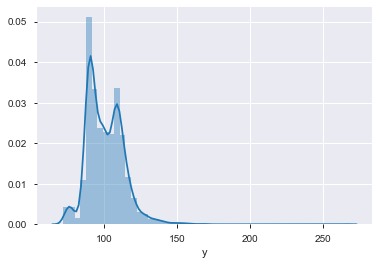

In [91]:
sns.distplot(y)

In [92]:
# Handling outliers
np.sum(df['y'] > 130)

81

In [93]:
df = df[df['y'] < 130]

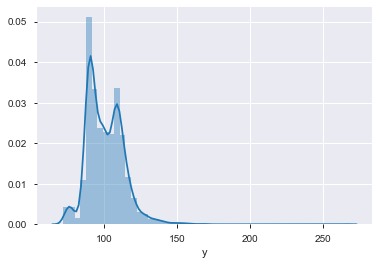

In [94]:
sns.distplot(y)

In [95]:
X_0_to_8 = pd.get_dummies(df.iloc[:,2:10],drop_first=True)

In [96]:
X = pd.concat([X_0_to_8, df.iloc[:,10:]],1)
y = df['y']

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 1 to 4208
Columns: 550 entries, X0_ab to X385
dtypes: int64(368), uint8(182)
memory usage: 12.3 MB


In [99]:
from sklearn.decomposition import PCA
len(X.columns)
pca = PCA(n_components=550)
pca.fit_transform(X)

variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[11.46 19.28 26.68 32.59 37.55 41.82 45.17 48.01 50.56 52.73 54.81 56.53
 58.04 59.49 60.87 62.17 63.38 64.47 65.45 66.37 67.26 68.11 68.94 69.72
 70.47 71.17 71.85 72.5  73.14 73.76 74.32 74.87 75.39 75.87 76.34 76.78
 77.21 77.63 78.05 78.45 78.83 79.21 79.58 79.93 80.28 80.62 80.94 81.25
 81.55 81.84 82.12 82.39 82.65 82.91 83.15 83.39 83.63 83.87 84.1  84.32
 84.54 84.76 84.97 85.18 85.39 85.59 85.79 85.99 86.19 86.38 86.57 86.76
 86.95 87.13 87.31 87.49 87.67 87.85 88.03 88.2  88.37 88.54 88.71 88.88
 89.05 89.21 89.37 89.53 89.69 89.85 90.01 90.17 90.32 90.47 90.62 90.77
 90.92 91.06 91.2  91.34 91.48 91.62 91.76 91.89 92.02 92.15 92.28 92.41
 92.53 92.65 92.77 92.89 93.01 93.12 93.23 93.34 93.45 93.56 93.67 93.78
 93.88 93.98 94.08 94.18 94.28 94.38 94.48 94.57 94.66 94.75 94.84 94.93
 95.02 95.11 95.2  95.28 95.36 95.44 95.52 95.6  95.68 95.76 95.84 95.92
 95.99 96.06 96.13 96.2  96.27 96.34 96.41 96.48 96.55 96.61 96.67 96.73
 96.79 96.85 96.91 96.97 97.03 97.09 97.15 97.2  97

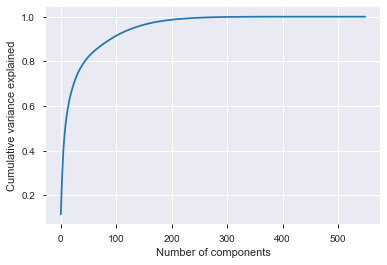

In [100]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [101]:
pca = PCA(n_components=91)
pca.fit(X)
X = pca.transform(X)

In [102]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.096109,-1.286582,-0.052387,-0.800803,0.297600,0.133177,1.101006,-0.734102,0.017719,0.613607,...,-0.049772,0.249540,-0.053872,0.271623,0.058258,-0.144926,-0.150653,0.119909,0.496177,0.300958
1,-0.667522,-2.431904,1.688227,2.466854,0.527666,3.672485,-1.162732,0.625718,-0.941066,-0.184849,...,0.017335,-0.034253,0.156804,0.124762,0.554498,0.369741,0.186524,-0.105691,0.167009,0.060016
2,-0.483483,-2.741276,0.410370,2.991373,-0.301886,3.684589,-0.286242,-0.110661,-1.218530,0.267382,...,-0.285846,-0.008113,-0.052151,-0.077114,0.000801,-0.085035,-0.108870,0.141438,0.226603,-0.079988
3,-0.526004,-2.740300,0.229513,3.223246,-0.528456,3.788912,-0.423155,0.031660,-1.759740,-0.306957,...,-0.225440,0.059779,-0.036136,0.126338,0.171054,0.222570,0.130545,-0.022963,-0.107987,0.147203
4,2.017705,1.541426,0.275884,0.345953,-1.262986,-0.269056,0.391016,-1.119946,-0.855379,0.420677,...,-0.382141,0.332311,-0.126593,0.003867,-0.055898,0.095513,-0.154034,0.105056,-0.374605,-0.352255


In [103]:
df_final = pd.concat([X,y],1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. XGBoost model

In [105]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
print(model)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


In [106]:
y_pred = model.predict(data=X_test)
final_df = pd.DataFrame()
final_df["Prediction"] = y_pred
final_df["Actual"] = y_test.values
final_df

,Prediction,Actual
0,99.161560,87.53
1,96.890953,90.25
2,75.163498,77.64
3,95.058571,114.23
4,106.962257,108.42
...,...,...
1234,102.930183,101.76
1235,96.976013,90.68
1236,90.891479,101.34
1237,95.408035,97.26


In [107]:
test_mse = mean_squared_error(y_true=final_df["Actual"], y_pred=final_df["Prediction"])
test_mae = mean_absolute_error(y_true=final_df["Actual"], y_pred=final_df["Prediction"])
print('Test MAE: {}'.format(test_mae))
print('Test MSE: {}'.format(test_mse))

Test MAE: 5.281997252334214
Test MSE: 51.63749031081895


In [108]:
y_avg = np.array([y_test.mean()] * len(y_test))
null_mse = mean_squared_error(y_true=final_df["Actual"], y_pred=y_avg)
null_mae = mean_absolute_error(y_true=final_df["Actual"], y_pred=y_avg)
print('Null MAE: {}'.format(null_mae))
print('Null MSE: {}'.format(null_mse))

Null MAE: 9.308450473936581
Null MSE: 120.79979295195622
